# Package

## Field

In [1]:
import pandas as pd
import numpy as np
import math
import torch

## Visualize 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Random

In [3]:
from scipy.stats import randint, uniform

## Scaler

In [4]:
from sklearn.preprocessing import StandardScaler,RobustScaler

## Transformation

In [5]:

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder

## Imbalance datasets

In [6]:
from imblearn.combine import SMOTEENN

## Model

In [7]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Metrics

In [8]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

## Optimize Method

In [9]:
import torch.optim as op

## Hyperparameter turning

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## lost Method

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# Data Preprocessing (LyDay)

In [12]:

file_path = 'loan_data.csv'  # Update the file path if necessary
loan_data = pd.read_csv(file_path)
loan_data.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [13]:
len(loan_data.columns)

14

In [14]:
loan_data.duplicated().sum()  # Check for duplicate rows
loan_data.drop_duplicates(inplace=True)  # Remove duplicate rows

In [16]:
print("Data Overview:")
loan_data_info = loan_data.info()  # Displays information about the dataset
loan_data_description = loan_data.describe()  # Displays summary statistics of the dataset
print(loan_data_info)
print(loan_data_description)

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_def

In [17]:
missing_values = loan_data.isnull().sum()  # Count of missing values in each column
print("\nMissing Values:")
print(missing_values)



Missing Values:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


## visualize

In [18]:
numeric_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns  # Identify numeric columns
# Apply Quantile Transformation
numeric_columns = [ i for i in numeric_columns if i != 'loan_status']


<Figure size 1200x800 with 0 Axes>

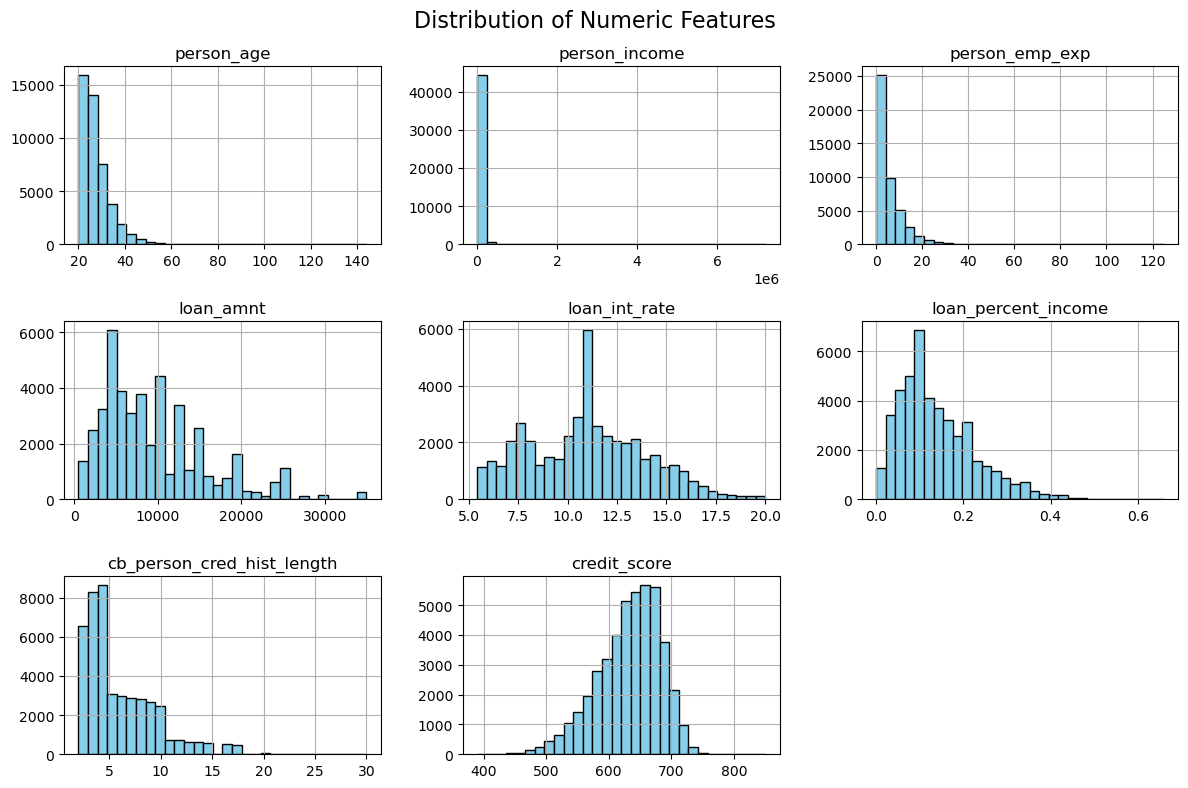

In [19]:
plt.figure(figsize=(12, 8))
loan_data[numeric_columns].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')  # Plot histograms for numeric columns
plt.suptitle('Distribution of Numeric Features', fontsize=16)  # Title of the plot
plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot

## Transformation

In [20]:
# Apply Quantile Transformation to normalize the distribution of numeric features

scaler = QuantileTransformer(output_distribution='normal')  # 'normal' for normal distribution
loan_data[numeric_columns] = scaler.fit_transform(loan_data[numeric_columns])

<Figure size 1200x800 with 0 Axes>

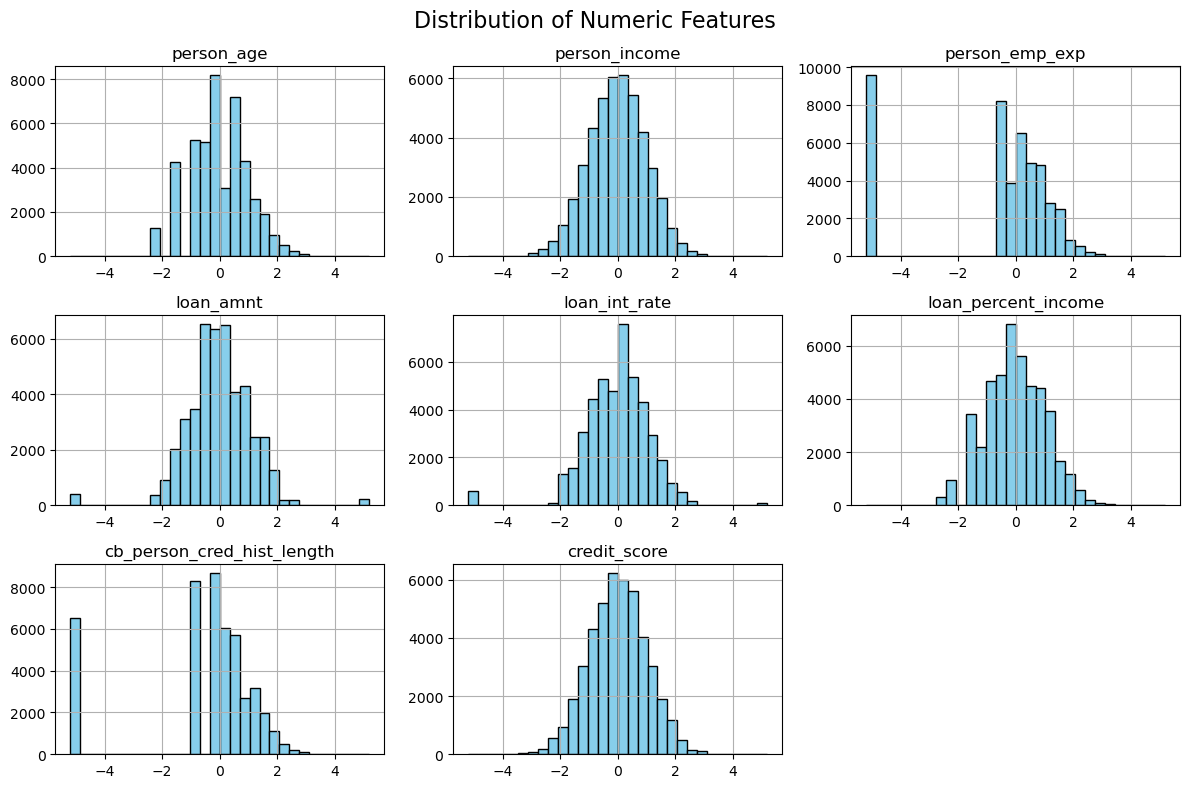

In [21]:
# Plot histograms after transformation
plt.figure(figsize=(12, 8))
loan_data[numeric_columns].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')  # Plot histograms for numeric columns
plt.suptitle('Distribution of Numeric Features', fontsize=16)  # Title of the plot
plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot

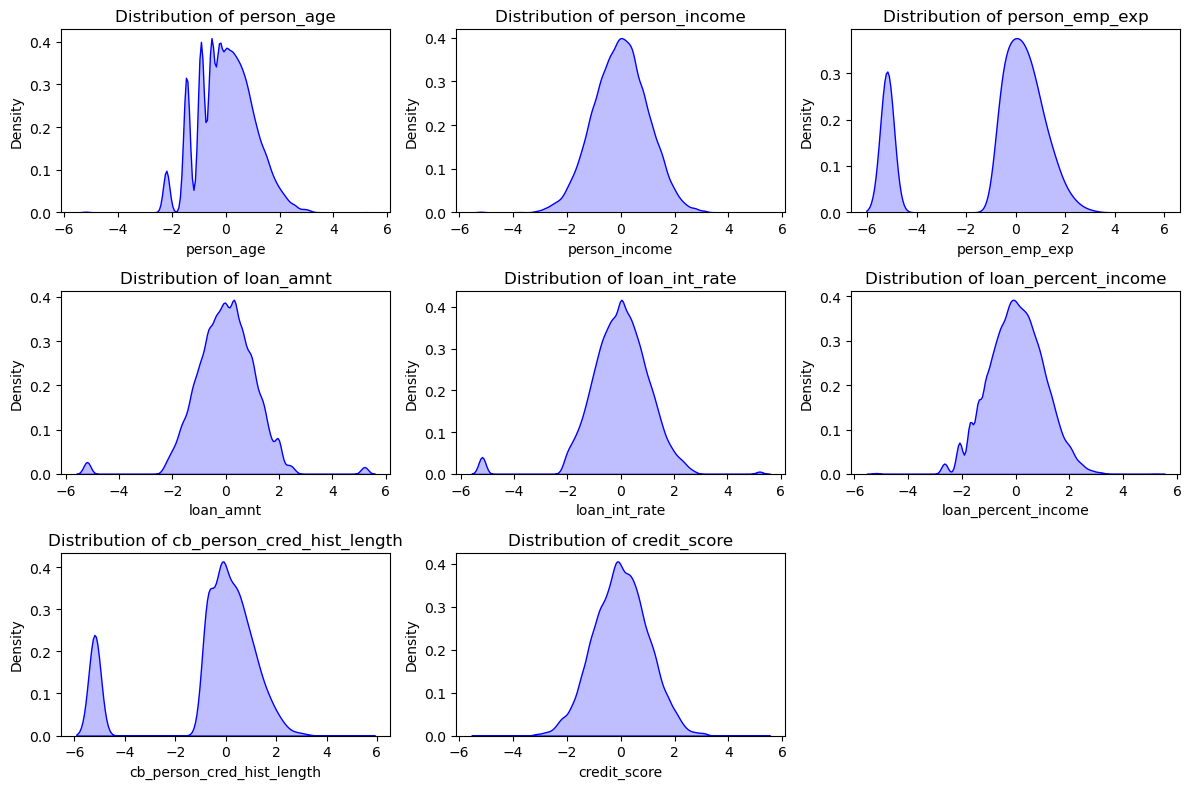

In [22]:
# Compare distributions before and after standardization using KDE plots
plt.figure(figsize=(12, 8))

# Original data (before standardization)
for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, idx)
    sns.kdeplot(data=loan_data, x=col, fill=True, color='blue')  # You can set a specific color here
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

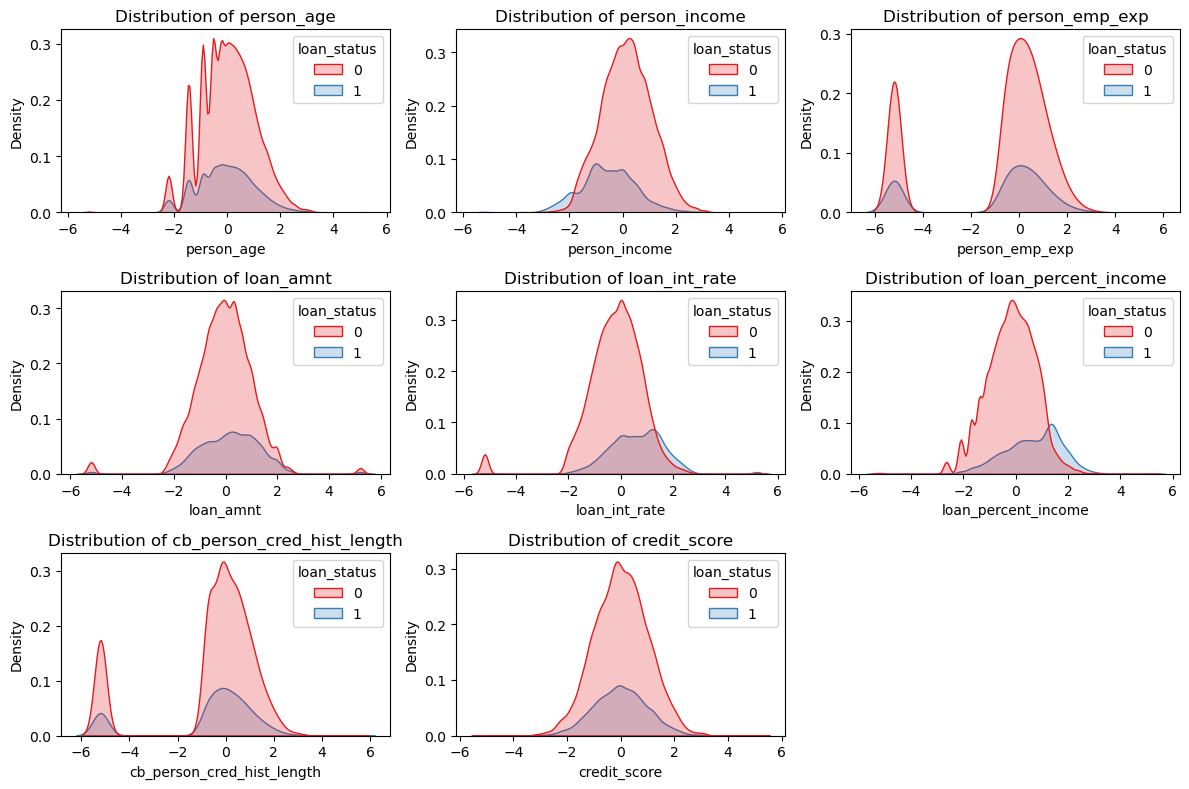

In [23]:
# Compare distributions before and after standardization using KDE plots
plt.figure(figsize=(12, 8))

# Original data (before standardization)
for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, idx)
    sns.kdeplot(data=loan_data, x=col, fill=True, hue='loan_status', palette='Set1')
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()


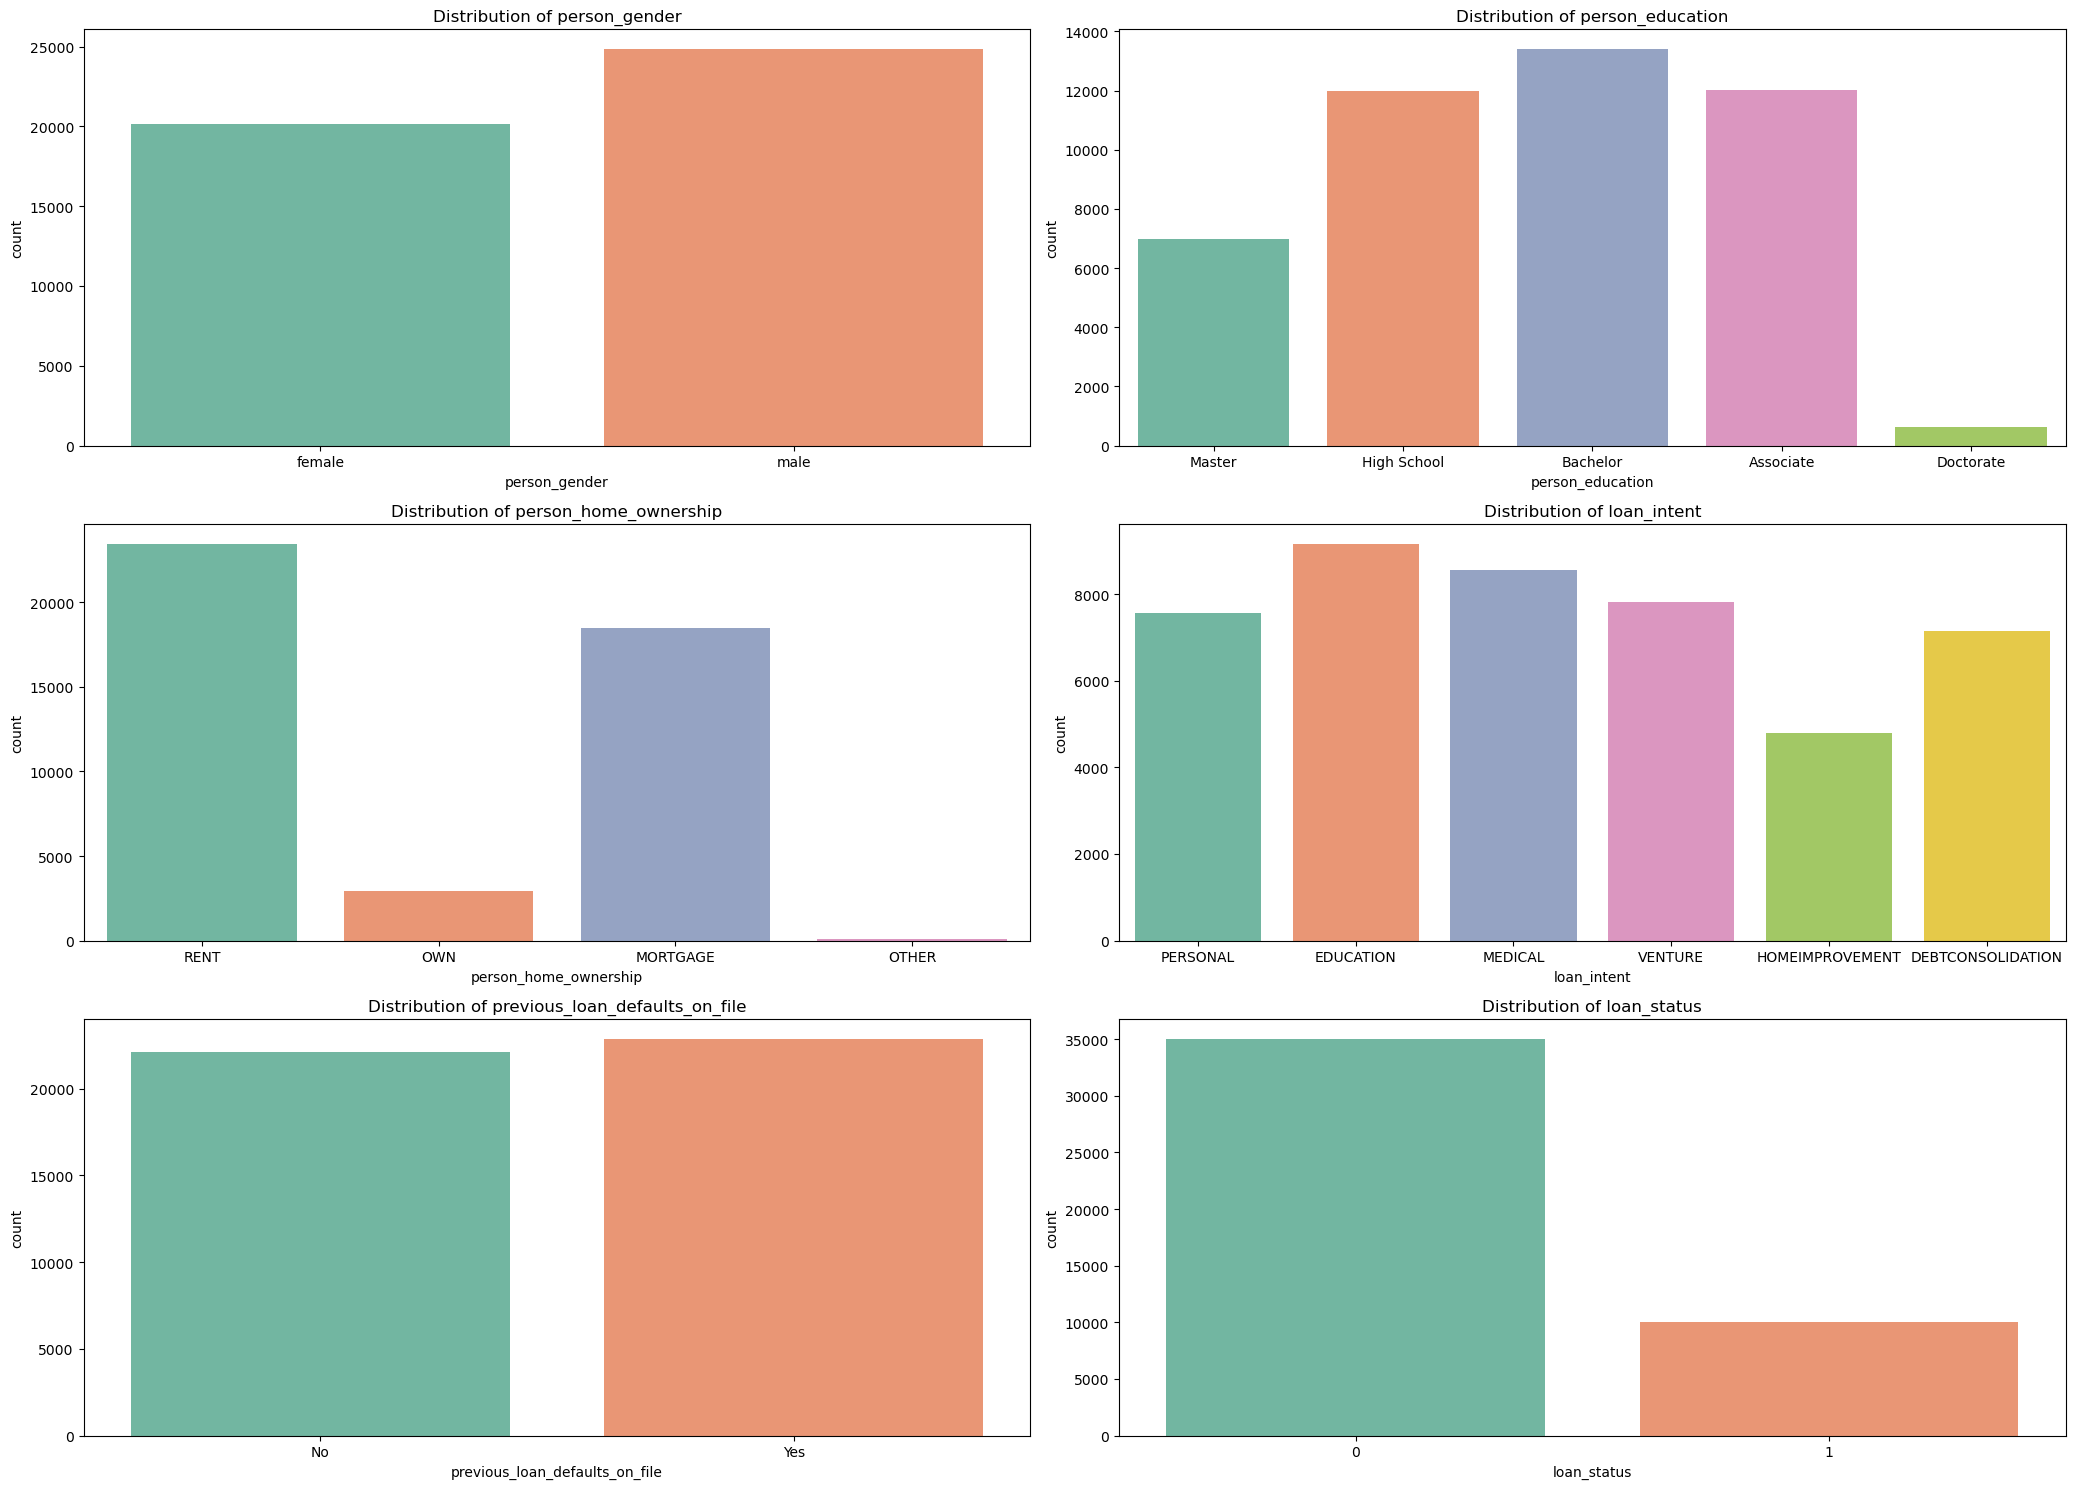

In [24]:
# Identify categorical columns
categorical_columns = loan_data.select_dtypes(include=['object']).columns.tolist()  # Convert to list
categorical_columns.append('loan_status')  # Add 'loan_status' to the list of categorical columns

# Plotting categorical features
plt.figure(figsize=(21, 15))
for idx, col in enumerate(categorical_columns, 1):  # Loop over each categorical column
    plt.subplot(3, 2, idx)  # Create subplots
    sns.countplot(data=loan_data, x=col, hue=col, palette='Set2', legend=False)  # Assign hue to col
    plt.title(f'Distribution of {col}')  # Title for each subplot

plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot


### Encode

In [25]:
df = loan_data.copy()  # Create a copy of the dataset

In [26]:

# Apply Label Encoding for ordinal features and One-Hot Encoding for nominal features
# First, let's apply Label Encoding to categorical features
label_encoder = LabelEncoder()

# List categorical columns
categorical_columns = loan_data.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column if it's ordinal or One-Hot Encoding if it's nominal
for col in categorical_columns:
    loan_data[col] = label_encoder.fit_transform(loan_data[col])
loan_data.head(5)  # Display the first 5 rows of the transformed dataset

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-1.456896,0,4,0.104092,-5.199338,3,5.199338,4,1.634747,2.935819,-0.702315,-1.292465,0,1
1,-2.211127,0,3,-2.875112,-5.199338,2,-5.199338,1,0.156199,-0.562796,-5.199338,-2.196894,1,0
2,-0.248427,0,3,-2.857538,-0.156199,0,-0.517790,3,0.624145,2.651732,-0.702315,-0.086674,0,1
3,-0.922330,0,1,0.336279,-5.199338,3,5.199338,3,1.318946,2.651732,-5.199338,0.819656,0,1
4,-0.537980,1,4,-0.037608,-0.664287,3,5.199338,3,1.055293,3.149293,-0.180377,-0.926176,0,1


## Dimensional Reduction

### Correlation

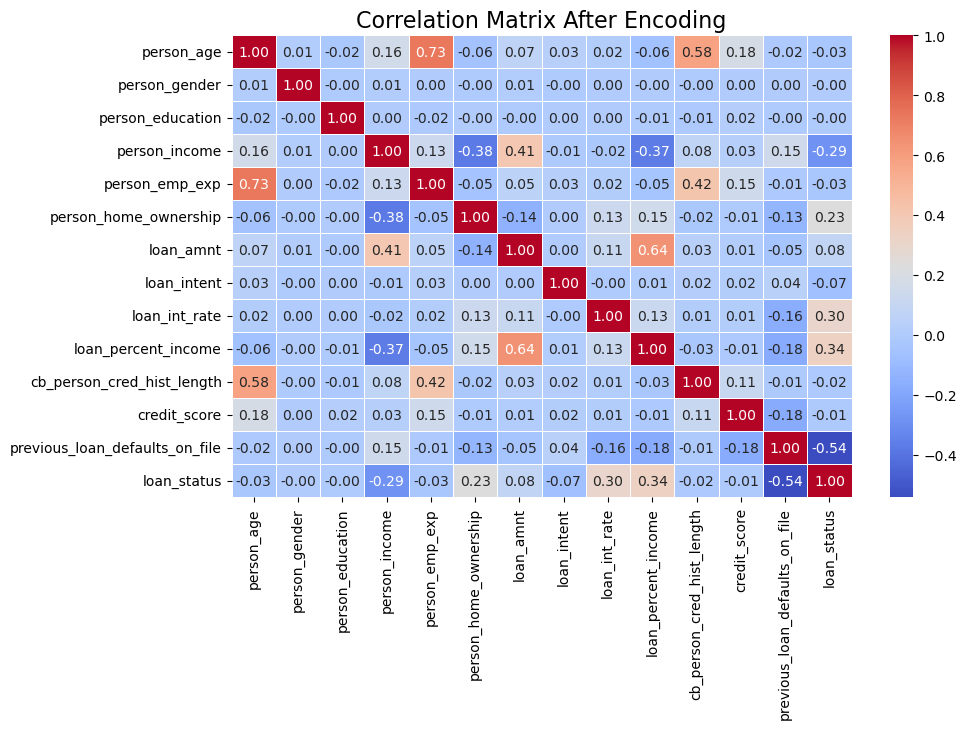

In [27]:


# Alternatively, you could use pd.get_dummies() for One-Hot Encoding
# loan_data_cleaned = pd.get_dummies(loan_data_cleaned, drop_first=True)

# Now, compute the correlation matrix for all numerical columns (including encoded ones)
numeric_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns  # Only numeric columns
correlation_matrix = loan_data[numeric_columns].corr()  # Compute the correlation matrix for numeric features

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix After Encoding', fontsize=16)
plt.show()  # Display the heatmap



In [28]:
loan_data = df.copy()  # Restore the original dataset

In [29]:
loan_data.drop(['person_age', 'person_education', 'credit_score','person_gender','person_emp_exp','loan_amnt','loan_intent','cb_person_cred_hist_length'], axis=1, inplace=True)

In [30]:
loan_data.head(5)

,person_income,person_home_ownership,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,0.104092,RENT,1.634747,2.935819,No,1
1,-2.875112,OWN,0.156199,-0.562796,Yes,0
2,-2.857538,MORTGAGE,0.624145,2.651732,No,1
3,0.336279,RENT,1.318946,2.651732,No,1
4,-0.037608,RENT,1.055293,3.149293,No,1


## Column Encode

In [31]:
loan_data = pd.get_dummies(loan_data, columns=['person_home_ownership'], drop_first=True, dtype='int64')
loan_data[col] = label_encoder.fit_transform(loan_data['previous_loan_defaults_on_file'])
loan_data.head(5)

,person_income,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,0.104092,1.634747,2.935819,0,1,0,0,1
1,-2.875112,0.156199,-0.562796,1,0,0,1,0
2,-2.857538,0.624145,2.651732,0,1,0,0,0
3,0.336279,1.318946,2.651732,0,1,0,0,1
4,-0.037608,1.055293,3.149293,0,1,0,0,1


In [32]:
target = loan_data['loan_status']  # Target variable
loan_data.drop('loan_status', axis=1, inplace=True)  # Drop the target variable from the dataset
loan_data = pd.concat([loan_data, target], axis=1)  # Concatenate the target variable to the dataset
loan_data.head(5)

,person_income,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_status
0,0.104092,1.634747,2.935819,0,0,0,1,1
1,-2.875112,0.156199,-0.562796,1,0,1,0,0
2,-2.857538,0.624145,2.651732,0,0,0,0,1
3,0.336279,1.318946,2.651732,0,0,0,1,1
4,-0.037608,1.055293,3.149293,0,0,0,1,1


### correlation

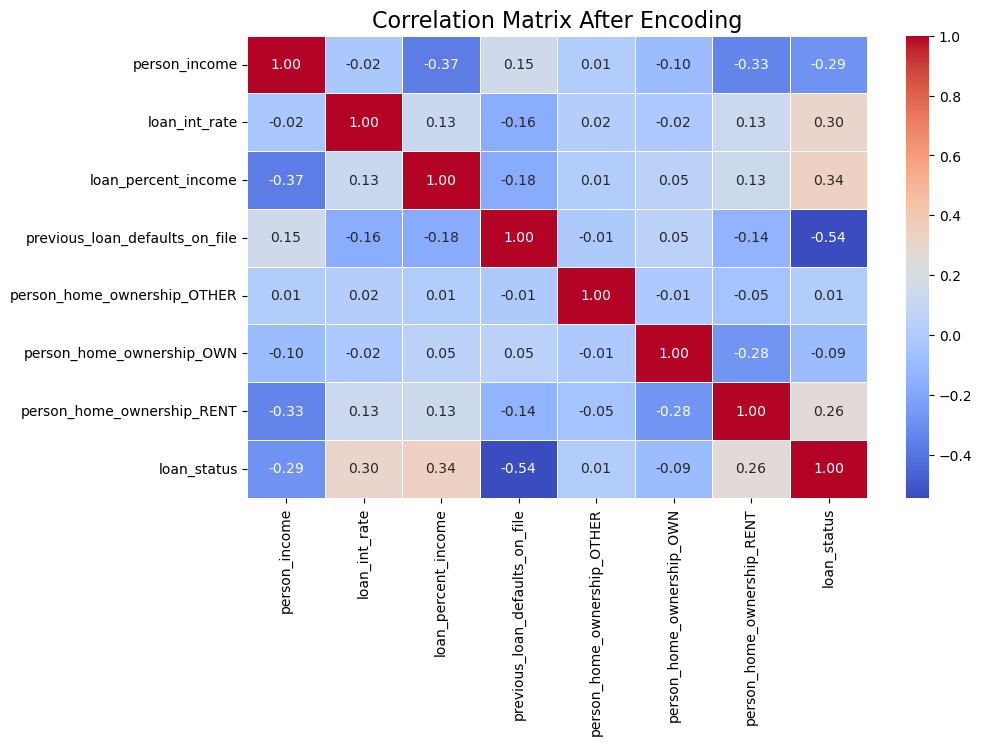

In [33]:
# Now, compute the correlation matrix for all numerical columns (including encoded ones)
numeric_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns  # Only numeric columns
correlation_matrix = loan_data[numeric_columns].corr()  # Compute the correlation matrix for numeric features

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix After Encoding', fontsize=16)
plt.show()  # Display the heatmap



In [34]:
loan_data.drop(columns=['person_home_ownership_OTHER','person_home_ownership_OWN'],axis=1, inplace=True)
loan_data.head(5)

,person_income,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,person_home_ownership_RENT,loan_status
0,0.104092,1.634747,2.935819,0,1,1
1,-2.875112,0.156199,-0.562796,1,0,0
2,-2.857538,0.624145,2.651732,0,0,1
3,0.336279,1.318946,2.651732,0,1,1
4,-0.037608,1.055293,3.149293,0,1,1


In [35]:
loan_data.duplicated().sum()  # Check for duplicate rows
loan_data.drop_duplicates(inplace=True)  # Remove duplicate rows

## Handle outiler

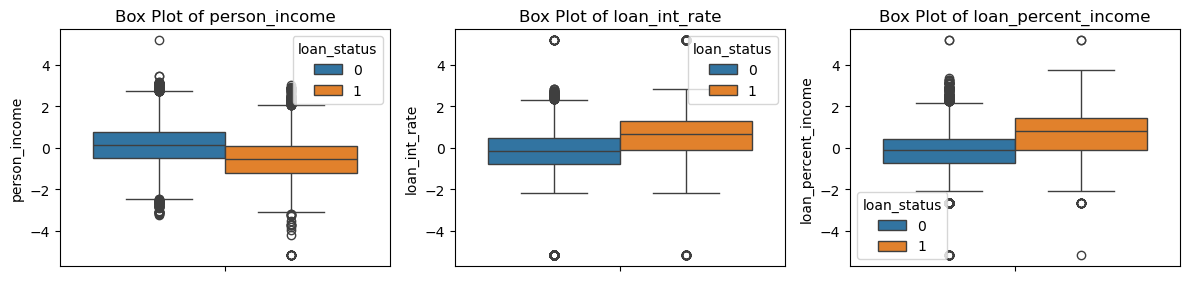

In [36]:
# Remove 'loan_status' column
loan_data_cleaned = loan_data.drop(columns=['person_home_ownership_RENT','previous_loan_defaults_on_file'],axis=1)
# Drop the 'loan_status' column
# Box plot for each numeric column to visualize distribution and potential outliers
plt.figure(figsize=(12, 8))
numeric_columns = loan_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [ i for i in numeric_columns if i != 'loan_status']
# Loop through each numeric column to create individual box plots
for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, idx)  # Adjust the grid size as needed
    sns.boxplot(data=loan_data_cleaned,hue='loan_status', y=col)  # Removed the palette parameter
    plt.title(f'Box Plot of {col}')  # Title for each box plot

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()  # Display the box plots


## Remove Outlier 

In [37]:
def remove_outlier(loan_data, target):
    # Separate classes
    class_0 = loan_data[loan_data[target] == 0].copy()
    class_1 = loan_data[loan_data[target] == 1].copy()

    # Select only numeric columns
    numeric_columns_0 = class_0.select_dtypes(include=[np.number])
    numeric_columns_1 = class_1.select_dtypes(include=[np.number])

    # Calculate IQR for each class separately
    Q1_0 = numeric_columns_0.quantile(0.25)
    Q3_0 = numeric_columns_0.quantile(0.75)
    IQR_0 = Q3_0 - Q1_0

    Q1_1 = numeric_columns_1.quantile(0.25)
    Q3_1 = numeric_columns_1.quantile(0.75)
    IQR_1 = Q3_1 - Q1_1

    # Create masks to filter out outliers separately
    mask_0 = ~((numeric_columns_0 < (Q1_0 - 1.5 * IQR_0)) | (numeric_columns_0 > (Q3_0 + 1.5 * IQR_0))).any(axis=1)
    mask_1 = ~((numeric_columns_1 < (Q1_1 - 1.5 * IQR_1)) | (numeric_columns_1 > (Q3_1 + 1.5 * IQR_1))).any(axis=1)

    # Apply masks to each class separately
    class_0_no_outliers = class_0[mask_0]
    class_1_no_outliers = class_1[mask_1]

    # Combine cleaned classes
    loan_data_no_outliers = pd.concat([class_0_no_outliers, class_1_no_outliers], axis=0)

    return loan_data_no_outliers

In [38]:
loan_data_no_outliers = remove_outlier(loan_data,'loan_status')

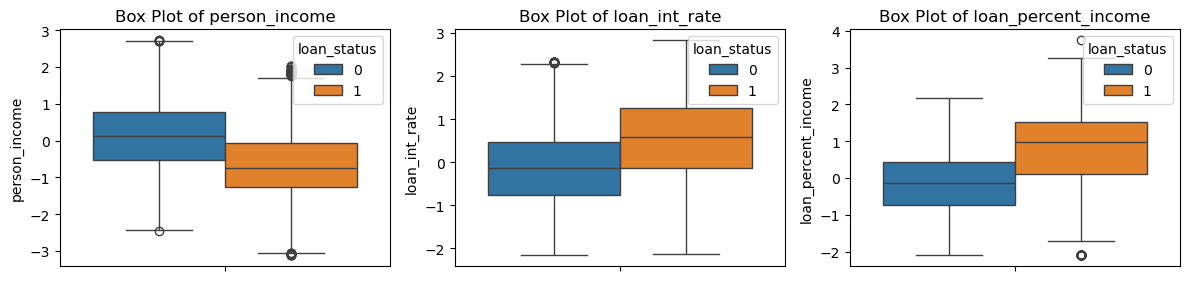

In [39]:
# Remove 'loan_status' column
loan_data_cleaned = loan_data_no_outliers.drop(columns=['person_home_ownership_RENT','previous_loan_defaults_on_file'],axis=1)
# Drop the 'loan_status' column
# Box plot for each numeric column to visualize distribution and potential outliers
plt.figure(figsize=(12, 8))
numeric_columns = loan_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [ i for i in numeric_columns if i != 'loan_status']
# Loop through each numeric column to create individual box plots
for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, idx)  # Adjust the grid size as needed
    sns.boxplot(data=loan_data_cleaned,hue='loan_status', y=col)  # Removed the palette parameter
    plt.title(f'Box Plot of {col}')  # Title for each box plot

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()  # Display the box plots

In [40]:
loan_data_no_outliers = remove_outlier(loan_data_no_outliers,'loan_status')

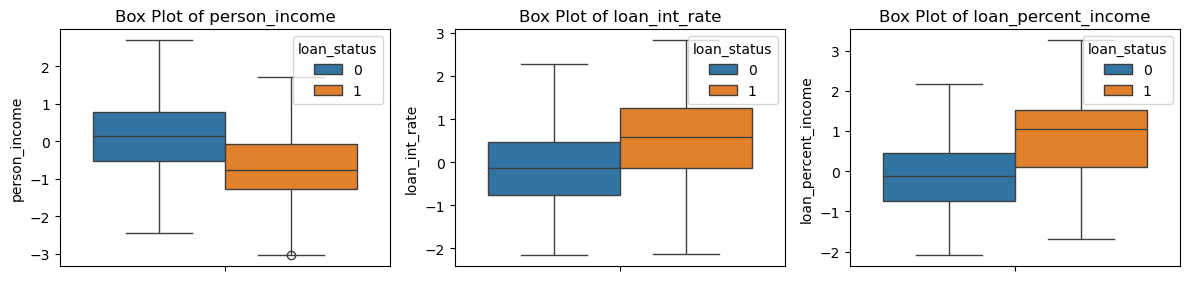

In [41]:
# Remove 'loan_status' column
loan_data_cleaned = loan_data_no_outliers.drop(columns=['person_home_ownership_RENT','previous_loan_defaults_on_file'],axis=1)
# Drop the 'loan_status' column
# Box plot for each numeric column to visualize distribution and potential outliers
plt.figure(figsize=(12, 8))
numeric_columns = loan_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [ i for i in numeric_columns if i != 'loan_status']
# Loop through each numeric column to create individual box plots
for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, idx)  # Adjust the grid size as needed
    sns.boxplot(data=loan_data_cleaned,hue='loan_status', y=col)  # Removed the palette parameter
    plt.title(f'Box Plot of {col}')  # Title for each box plot

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()  # Display the box plots

In [42]:
loan_data_no_outliers = remove_outlier(loan_data_no_outliers,'loan_status')

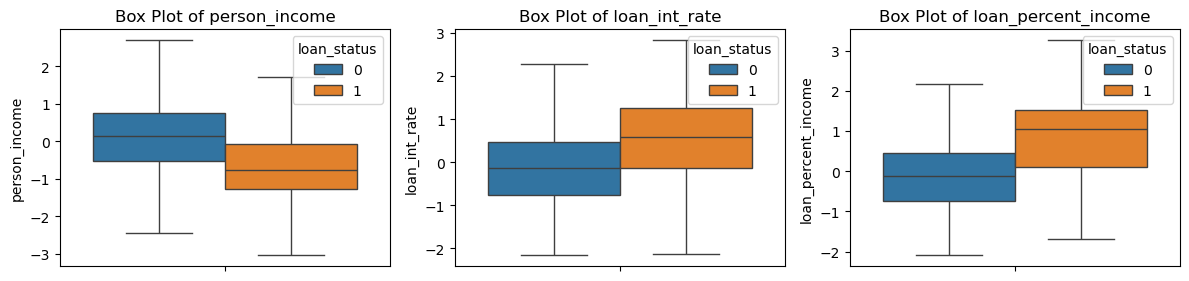

In [43]:
# Remove 'loan_status' column
loan_data_cleaned = loan_data_no_outliers.drop(columns=['person_home_ownership_RENT','previous_loan_defaults_on_file'],axis=1)
# Drop the 'loan_status' column
# Box plot for each numeric column to visualize distribution and potential outliers
plt.figure(figsize=(12, 8))
numeric_columns = loan_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [ i for i in numeric_columns if i != 'loan_status']
# Loop through each numeric column to create individual box plots
for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, idx)  # Adjust the grid size as needed
    sns.boxplot(data=loan_data_cleaned,hue='loan_status', y=col)  # Removed the palette parameter
    plt.title(f'Box Plot of {col}')  # Title for each box plot

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()  # Display the box plots

In [44]:
loan_data_no_outliers = remove_outlier(loan_data_no_outliers,'loan_status')

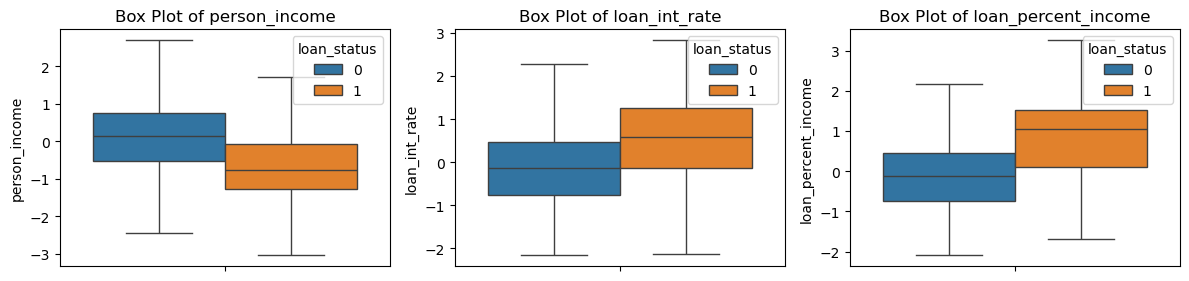

In [45]:
# Remove 'loan_status' column
loan_data_cleaned = loan_data_no_outliers.drop(columns=['person_home_ownership_RENT','previous_loan_defaults_on_file'],axis=1)
# Drop the 'loan_status' column
# Box plot for each numeric column to visualize distribution and potential outliers
plt.figure(figsize=(12, 8))
numeric_columns = loan_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [ i for i in numeric_columns if i != 'loan_status']
# Loop through each numeric column to create individual box plots
for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, idx)  # Adjust the grid size as needed
    sns.boxplot(data=loan_data_cleaned,hue='loan_status', y=col)  # Removed the palette parameter
    plt.title(f'Box Plot of {col}')  # Title for each box plot

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()  # Display the box plots

In [46]:
len(loan_data_no_outliers),len(loan_data)


(41087, 44984)

In [47]:
correlation_matrix_no_outliers = loan_data_no_outliers[numeric_columns].corr()

## Correlation and box plot after remove outlier 

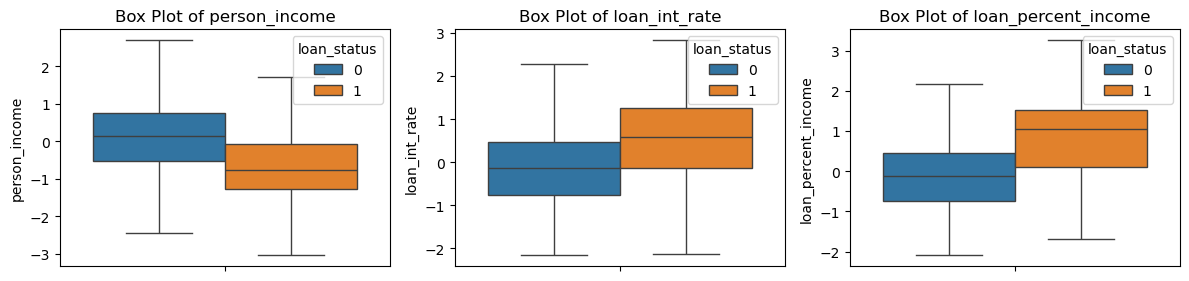

In [48]:
# Remove 'loan_status' column
loan_data_cleaned = loan_data_no_outliers.drop(columns=['person_home_ownership_RENT','previous_loan_defaults_on_file'],axis=1)
# Drop the 'loan_status' column
# Box plot for each numeric column to visualize distribution and potential outliers
plt.figure(figsize=(12, 8))
numeric_columns = loan_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [ i for i in numeric_columns if i != 'loan_status']
# Loop through each numeric column to create individual box plots
for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, idx)  # Adjust the grid size as needed
    sns.boxplot(data=loan_data_cleaned,hue='loan_status', y=col)  # Removed the palette parameter
    plt.title(f'Box Plot of {col}')  # Title for each box plot

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()  # Display the box plots

In [49]:
loan_data_no_outliers['loan_status'].value_counts()

loan_status
0    33681
1     7406
Name: count, dtype: int64

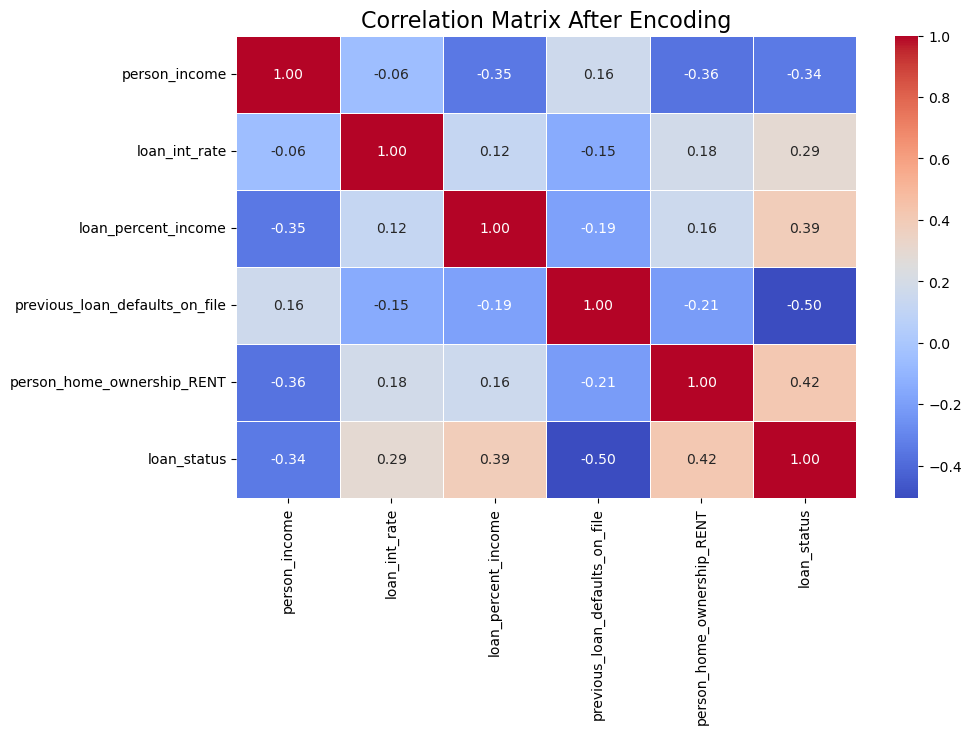

In [50]:
# Now, compute the correlation matrix for all numerical columns (including encoded ones)
numeric_columns = loan_data_no_outliers.select_dtypes(include=['float64', 'int64']).columns  # Only numeric columns
correlation_matrix = loan_data_no_outliers[numeric_columns].corr()  # Compute the correlation matrix for numeric features

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix After Encoding', fontsize=16)
plt.show()  # Display the heatmap

In [51]:
loan_data_no_outliers.duplicated().sum()  # Check for duplicate rows
loan_data_no_outliers.drop_duplicates(inplace=True)  # Remove duplicate rows

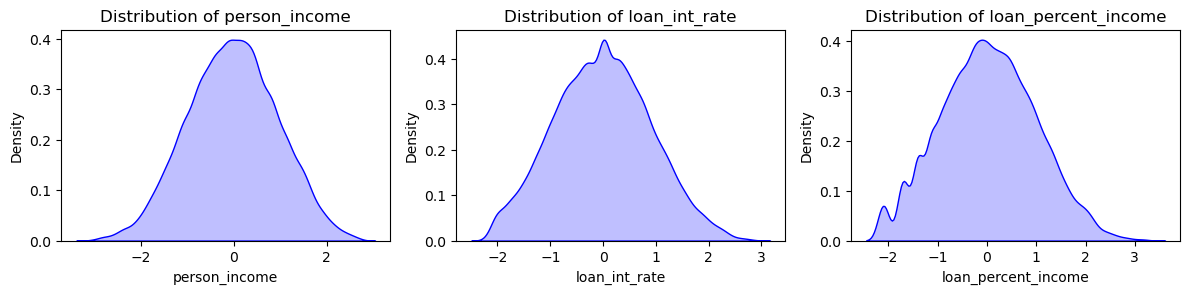

In [52]:
# Compare distributions before and after standardization using KDE plots
plt.figure(figsize=(12, 8))
column = [i for i in numeric_columns if i not in ['loan_status','person_home_ownership_RENT','previous_loan_defaults_on_file']]
# Original data (before standardization)
for idx, col in enumerate(column, 1):
    plt.subplot(3, 3, idx)
    sns.kdeplot(data=loan_data_no_outliers, x=col, fill=True, color='blue')  # You can set a specific color here
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

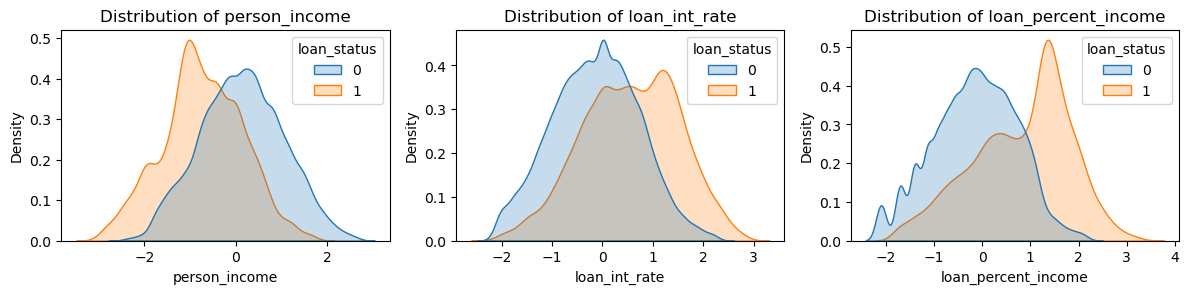

In [53]:
# Compare distributions before and after standardization using KDE plots
plt.figure(figsize=(12, 8))

# Original data (before standardization)
for idx, col in enumerate(column, 1):
    plt.subplot(3, 3, idx)
    sns.kdeplot(data=loan_data_no_outliers, x=col, fill=True, hue='loan_status', common_norm=False, warn_singular=False)
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()


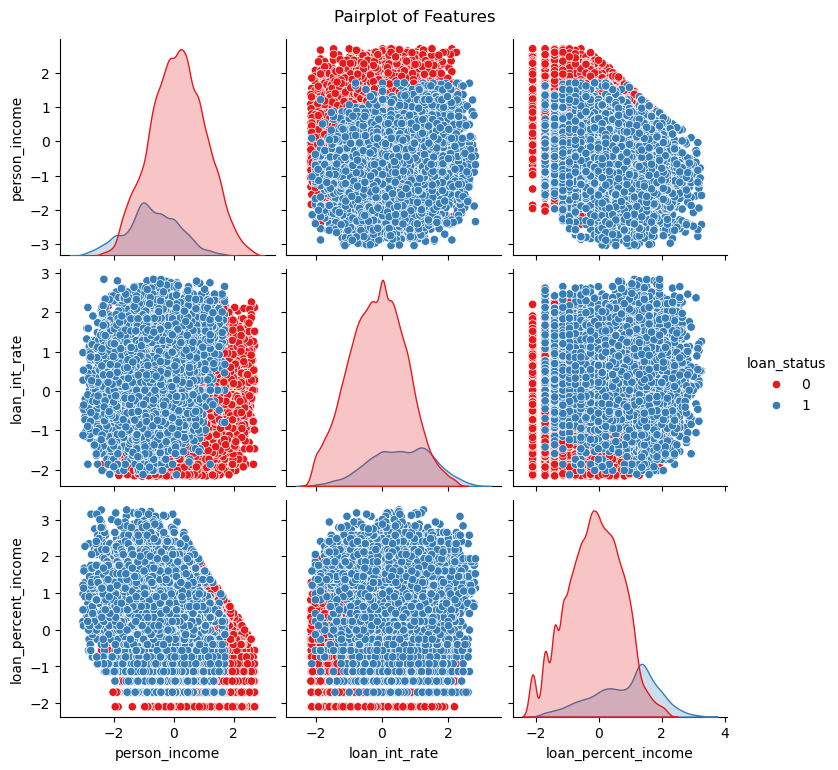

In [54]:
cols = column + ['loan_status']
sns.pairplot(loan_data_no_outliers[cols], hue='loan_status', diag_kind='kde', palette='Set1')  # Pairplot for visualizing relationships
plt.suptitle('Pairplot of Features', y=1.02)  # Adjust title position
plt.show()  # Show the pairplot

In [55]:
loan_data_no_outliers.duplicated().sum()  # Check for duplicate rows
loan_data_no_outliers.drop_duplicates(inplace=True)  # Remove duplicate rows

In [56]:
len(loan_data_no_outliers.columns)

6

# With outlier (Agent Loid Panha)

In [57]:
def scale(train,validate,test,resampling=False):
  train = train.to_numpy()
  validate = validate.to_numpy()
  test = test.to_numpy()
  x_train = train[:,:-1]
  y_train = train[:,-1].reshape(-1,1)
  train = np.hstack((x_train,y_train))

  x_validate = validate[:,:-1]
  y_validate = validate[:,-1].reshape(-1,1)
  validate = np.hstack((x_validate,y_validate))

  x_test = test[:,:-1]
  y_test = test[:,-1].reshape(-1,1)
  validate = np.hstack((x_test,y_test))

  scale = RobustScaler()
  x_train = scale.fit_transform(x_train)
  x_validate = scale.transform(x_validate)
  x_test = scale.transform(x_test)
  if resampling:
    smote = SMOTEENN(sampling_strategy='minority', random_state=42)
    x_train, y_train = smote.fit_resample(x_train, y_train)
  return x_train,y_train,train,x_validate,y_validate,validate,x_test,y_test,test

In [58]:
train, validate, test = \
              np.split(loan_data.sample(frac=1, random_state=42),
                       [int(.6*len(loan_data)), int(.8*len(loan_data))])

/home/sopanha/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


<Axes: title={'center': 'Count (target)'}, xlabel='loan_status'>

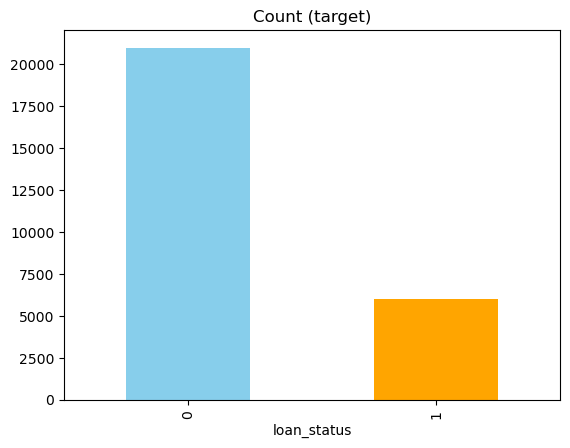

In [59]:
train['loan_status'].value_counts().plot(kind='bar', title='Count (target)', color=['skyblue', 'orange'])

In [60]:
x_train,y_train,train_,x_validate,y_validate,validate_,x_test,y_test,test_ = scale(train,validate,test,resampling=True)

## XGbost 

In [61]:
param_dist = {
    'n_estimators': randint(100, 500),  # Reduce high values to prevent overfitting
    'max_depth': randint(3, 8),  # Prevent overly deep trees
    'learning_rate': uniform(0.01, 0.2),  # Keep it lower to avoid instability
    'subsample': uniform(0.6, 0.3),  # Avoid very low or very high subsampling
    'colsample_bytree': uniform(0.6, 0.3),  # Avoid low values
    'min_child_weight': randint(1, 6),  # Keep within reasonable range
    'reg_alpha': uniform(0, 5),  # Reduce regularization impact
    'reg_lambda': uniform(0, 5)
}

clf_xgb = xgb(objective='binary:logistic')
# Randomized Search
random_search = RandomizedSearchCV(clf_xgb, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42 ,error_score='raise')
random_search.fit(x_train, y_train)

# Best Hyperparameters from Training
print("Best Hyperparameters:", random_search.best_params_)

# Best Model on Validation Set
best_model = random_search.best_estimator_
val_accuracy = best_model.score(x_validate, y_validate)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Best Hyperparameters: {'colsample_bytree': 0.6524864781287808, 'learning_rate': 0.20643366866588714, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 468, 'reg_alpha': 1.2092614545022584, 'reg_lambda': 0.46551383902949606, 'subsample': 0.8691647273859979}
Validation Accuracy: 0.8782


In [62]:
# Make predictions
y_pred = best_model.predict(x_test)

In [63]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [64]:
print(class_report)

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      7009
         1.0       0.67      0.90      0.77      1988

    accuracy                           0.88      8997
   macro avg       0.82      0.89      0.84      8997
weighted avg       0.90      0.88      0.89      8997



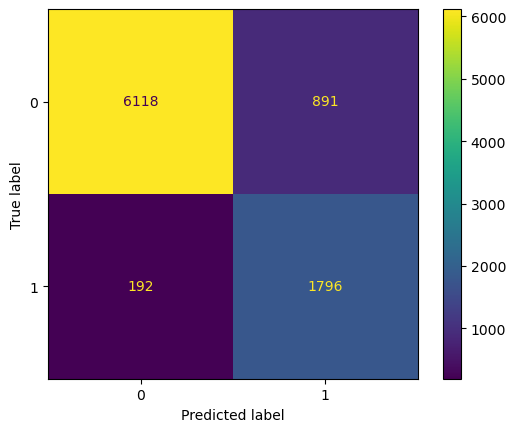

In [65]:
cm = confusion_matrix(y_test,y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
disp.plot()
plt.show()

## Random Forest

In [68]:
rf_model = RandomForestClassifier(criterion='gini',class_weight="balanced",
                                  max_depth=8,
                                  min_samples_split=50)
rf_model.fit(x_train, y_train)
val_accuracy = rf_model.score(x_validate, y_validate)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.8573969100811382


In [71]:
y_pred = rf_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90      7009
         1.0       0.62      0.91      0.73      1988

    accuracy                           0.85      8997
   macro avg       0.79      0.87      0.82      8997
weighted avg       0.89      0.85      0.86      8997



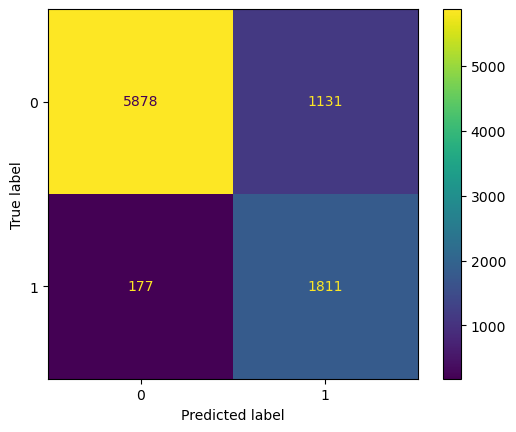

In [72]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

## Supporting Vector Machine SVM

In [73]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], 
    'degree': [2, 3, 4],  # Only used for 'poly' kernel
    'class_weight': [None, 'balanced']
}
svm = SVC()
random_search = RandomizedSearchCV(clf_xgb, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42 ,error_score='raise')
random_search.fit(x_train, y_train)

# Best Hyperparameters from Training
print("Best Hyperparameters:", random_search.best_params_)

# Best Model on Validation Set
best_model = random_search.best_estimator_
val_accuracy = best_model.score(x_validate, y_validate)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Best Hyperparameters: {'colsample_bytree': 0.6524864781287808, 'learning_rate': 0.20643366866588714, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 468, 'reg_alpha': 1.2092614545022584, 'reg_lambda': 0.46551383902949606, 'subsample': 0.8691647273859979}
Validation Accuracy: 0.8782


In [74]:
# Make predictions
y_pred = best_model.predict(x_test)

In [75]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [76]:
print(class_report)

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      7009
         1.0       0.67      0.90      0.77      1988

    accuracy                           0.88      8997
   macro avg       0.82      0.89      0.84      8997
weighted avg       0.90      0.88      0.89      8997



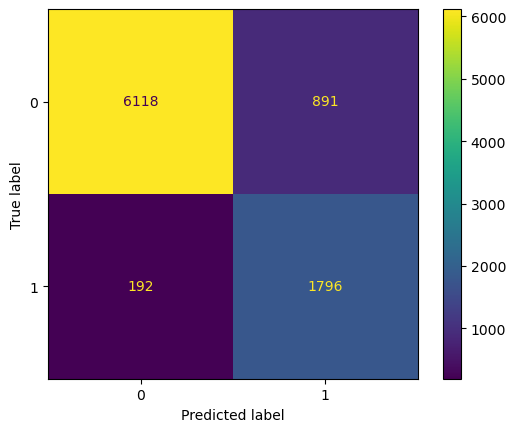

In [77]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

## without outlier

In [78]:
def scale(train,validate,test,resampling=False):
  train = train.to_numpy()
  validate = validate.to_numpy()
  test = test.to_numpy()
  x_train = train[:,:-1]
  y_train = train[:,-1].reshape(-1,1)
  train = np.hstack((x_train,y_train))

  x_validate = validate[:,:-1]
  y_validate = validate[:,-1].reshape(-1,1)
  validate = np.hstack((x_validate,y_validate))

  x_test = test[:,:-1]
  y_test = test[:,-1].reshape(-1,1)
  validate = np.hstack((x_test,y_test))

  scale = StandardScaler()
  x_train = scale.fit_transform(x_train)
  x_validate = scale.transform(x_validate)
  x_test = scale.transform(x_test)
  if resampling:
    smote = SMOTEENN(sampling_strategy='minority', random_state=42)
    x_train, y_train = smote.fit_resample(x_train, y_train)
  return x_train,y_train,train,x_validate,y_validate,validate,x_test,y_test,test

In [79]:
train, validate, test = \
              np.split(loan_data_no_outliers.sample(frac=1, random_state=42),
                       [int(.6*len(loan_data_no_outliers)), int(.8*len(loan_data_no_outliers))])

/home/sopanha/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


<Axes: title={'center': 'Count (target)'}, xlabel='loan_status'>

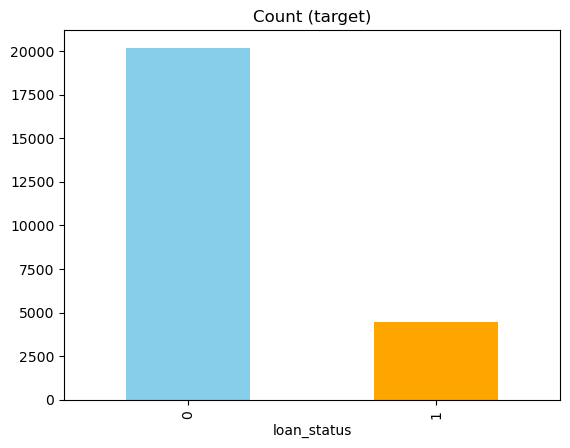

In [80]:
train['loan_status'].value_counts().plot(kind='bar', title='Count (target)', color=['skyblue', 'orange'])

In [81]:
x_train,y_train,train_,x_validate,y_validate,validate_,x_test,y_test,test_ = scale(train,validate,test,resampling=True)

## Logistic Regression From Scikitlearn (SengMeng)

In [82]:
# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Compatible solvers
}

# Logistic Regression model
log_reg = LogisticRegression(max_iter=5000)

# Grid Search with 5-Fold Cross-Validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)  # Ensure variable names match

# Best Hyperparameters from Training
print("Best Hyperparameters:", grid_search.best_params_)

# Validate on Validation Set
best_model = grid_search.best_estimator_
val_accuracy = best_model.score(x_validate, y_validate)  # Use correct validation data
print(f"Validation Accuracy: {val_accuracy:.4f}")

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Validation Accuracy: 0.8956


In [83]:
# Define hyperparameter distribution
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
logreg = LogisticRegression(max_iter=500)

# Randomized Search
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

# Best Hyperparameters from Training
print("Best Hyperparameters:", random_search.best_params_)

# Best Model on Validation Set
best_model = random_search.best_estimator_
val_accuracy = best_model.score(x_validate, y_validate)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.08858667904100824}
Validation Accuracy: 0.8952


In [84]:
# Make predictions
y_pred = best_model.predict(x_test)

In [85]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [86]:
print(class_report)

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93      6766
         1.0       0.63      0.98      0.77      1452

    accuracy                           0.89      8218
   macro avg       0.81      0.93      0.85      8218
weighted avg       0.93      0.89      0.90      8218



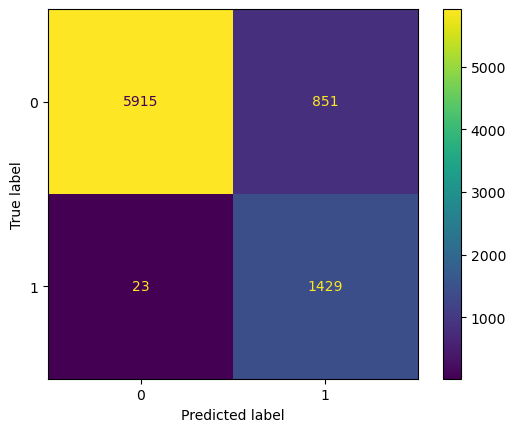

In [87]:
# Ensure confusion_matrix is correctly imported and used
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

## Logistic Regression From GD (Thunin)

### Hypophes $Z = \theta_0 +  \theta_1X_1 + \theta_2X_2 +\theta_3X_3 + \theta_4X_4+\theta_5X_5 $

In [88]:
# Define functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hyp(X, theta):
    return sigmoid(np.dot(X, theta))

def cost(X_batch, y_batch, theta):
    h = hyp(X_batch, theta)
    h = np.clip(h, 1e-15, 1 - 1e-15)  # Avoid log(0) or log(1)
    return -np.mean(y_batch * np.log(h) + (1 - y_batch) * np.log(1 - h))

def gradient(X_batch, y_batch, theta):
    h = hyp(X_batch, theta)
    y_batch = y_batch.reshape(-1, 1)  # Ensure y_batch is a column vector
    return np.dot(X_batch.T, h - y_batch) / len(y_batch)


# Concatenate 1 to X for the intercept term
X_new = np.concatenate((np.ones((len(x_train), 1)), x_train), axis=1)
x_validate_new = np.concatenate((np.ones((len(x_validate), 1)), x_validate), axis=1)
x_test_new = np.concatenate((np.ones((len(x_test), 1)), x_test), axis=1)

In [89]:

# Initialize theta with small random values
theta = np.zeros((X_new.shape[1], 1))

# Hyperparameters
lr = 0.1  # Learning rate
epochs = 500
batch_size = 100
num_batches = math.ceil(len(X_new) / batch_size)  # Ensure all samples are processed

# Lists to store training and validation loss
train_losses = []
val_losses = []

for i in range(epochs):
    for j in range(num_batches):
        batch_start = j * batch_size
        batch_end = min((j + 1) * batch_size, len(X_new))  # Handle last batch

        X_batch = X_new[batch_start:batch_end]
        y_batch = y_train[batch_start:batch_end].reshape(-1, 1)  # Ensure correct shape

        # Compute gradient and update theta
        grad = gradient(X_batch, y_batch, theta)
        theta -= lr * grad

    # Compute training and validation loss after each epoch
    train_loss = cost(X_new, y_train.reshape(-1, 1), theta)
    val_loss = cost(x_validate_new, y_validate.reshape(-1, 1), theta)  # Validation loss

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if(i+1) % 100 == 0:
        print(f'Epoch {i+1:03d}: train_loss = {train_loss:.4f}, val_loss = {val_loss:.4f}')



Epoch 100: train_loss = 0.0870, val_loss = 0.3855
Epoch 200: train_loss = 0.0865, val_loss = 0.3854
Epoch 300: train_loss = 0.0863, val_loss = 0.3854
Epoch 400: train_loss = 0.0863, val_loss = 0.3854
Epoch 500: train_loss = 0.0862, val_loss = 0.3854


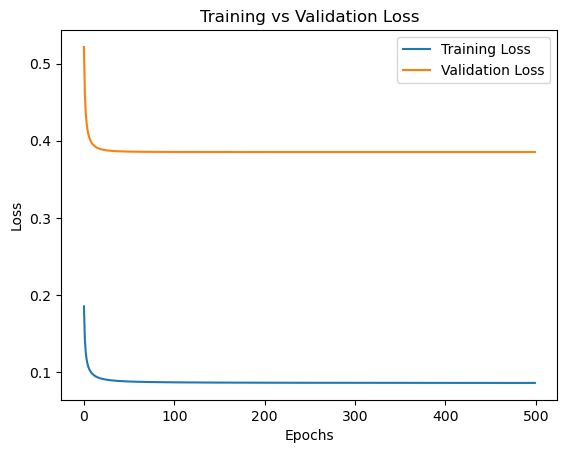

In [90]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [91]:
# Model evaluation
h = hyp(x_test_new, theta)
y_hat = np.zeros((len(y_test), 1))
y_hat[h<0.5] = 0
y_hat[h >= 0.5] = 1  # Set predicted value to 1 if prediction is >= 0.5
accuracy = np.mean(y_hat == y_test.reshape(-1, 1)) * 100  # Ensure y_train is reshaped
print(f"Accuracy: {accuracy:.4f}")
class_report = classification_report(y_test, y_hat)
print(class_report)

Accuracy: 88.0019
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92      6766
         1.0       0.60      0.99      0.75      1452

    accuracy                           0.88      8218
   macro avg       0.80      0.92      0.83      8218
weighted avg       0.93      0.88      0.89      8218



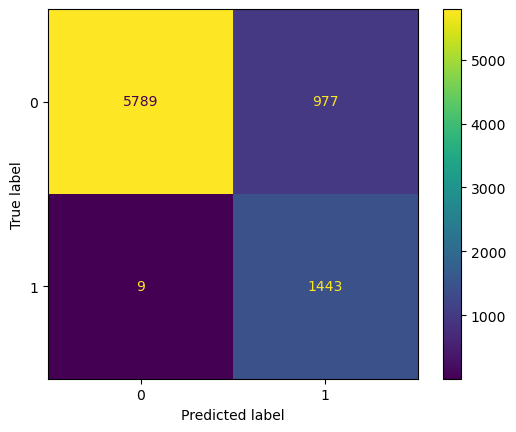

In [92]:
# Ensure confusion_matrix is correctly imported and used
confusion_matrix = metrics.confusion_matrix(y_test, y_hat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

## Hypothese $Z = \theta_0 +  \theta_1X_1 + \theta_2X_2 +\theta_3X_3 + \theta_4X_4+\theta_5X_5 +  \theta_6X^2_1 + \theta_7X^2_2 +\theta_8X^2_3 + \theta_9X^2_4+\theta_{10}X^2_{5}  $ (Raksa)

In [93]:

x_train_tensor  = torch.tensor(x_train,dtype=torch.float32)
y_train_tensor  = torch.tensor(y_train,dtype=torch.float32)
x_validate_tensor  = torch.tensor(x_validate,dtype=torch.float32)
y_validate_tensor  = torch.tensor(y_validate,dtype=torch.float32)
x_test_tensor  = torch.tensor(x_test,dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test,dtype=torch.float32)

In [94]:
def hyp(X,theta):
  return torch.sigmoid(torch.matmul(X,theta))

In [95]:
x_train_tensor_new = torch.cat((x_train_tensor, x_train_tensor**2), dim=1)
x_train_tensor_new = torch.cat((torch.ones((x_train_tensor.shape[0], 1)), x_train_tensor_new), dim=1)
x_validate_tensor_new = torch.cat((x_validate_tensor, x_validate_tensor**2), dim=1)
x_validate_tensor_new = torch.cat((torch.ones((x_validate_tensor.shape[0], 1)), x_validate_tensor_new), dim=1)
x_test_tensor_new = torch.cat((x_test_tensor, x_test_tensor**2), dim=1)
x_test_tensor_new = torch.cat((torch.ones((x_test_tensor.shape[0], 1)), x_test_tensor_new), dim=1)

In [96]:
theta = torch.zeros((11,1),dtype=torch.float32,requires_grad=True)
optimizer = op.SGD([theta],lr=1)
cost_fuct = nn.BCELoss()
epochs = 1500
train_losses = []
val_losses = []
for epoch in range(epochs):
  h_train = hyp(x_train_tensor_new,theta)
  train_loss = cost_fuct(h_train,y_train_tensor.reshape(-1,1))
  train_loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  # Compute validation loss (without tracking gradients)
  with torch.no_grad():
      h_val = hyp(x_validate_tensor_new , theta)
      val_loss = cost_fuct(h_val, y_validate_tensor.reshape(-1,1))
  # Store losses for plotting
  train_losses.append(train_loss.item())
  val_losses.append(val_loss.item())

  # Print loss every 50 epochs
  if (epoch + 1) % 50 == 0:
      print(f'Epoch {epoch+1:03d}: train_loss = {train_loss.item():.4f}, val_loss = {val_loss.item():.4f}')

Epoch 050: train_loss = 0.1038, val_loss = 0.2581
Epoch 100: train_loss = 0.0885, val_loss = 0.2527
Epoch 150: train_loss = 0.0826, val_loss = 0.2515
Epoch 200: train_loss = 0.0794, val_loss = 0.2513
Epoch 250: train_loss = 0.0774, val_loss = 0.2516
Epoch 300: train_loss = 0.0760, val_loss = 0.2520
Epoch 350: train_loss = 0.0749, val_loss = 0.2525
Epoch 400: train_loss = 0.0741, val_loss = 0.2530
Epoch 450: train_loss = 0.0735, val_loss = 0.2535
Epoch 500: train_loss = 0.0730, val_loss = 0.2540
Epoch 550: train_loss = 0.0726, val_loss = 0.2544
Epoch 600: train_loss = 0.0722, val_loss = 0.2549
Epoch 650: train_loss = 0.0719, val_loss = 0.2553
Epoch 700: train_loss = 0.0716, val_loss = 0.2557
Epoch 750: train_loss = 0.0714, val_loss = 0.2560
Epoch 800: train_loss = 0.0712, val_loss = 0.2564
Epoch 850: train_loss = 0.0710, val_loss = 0.2567
Epoch 900: train_loss = 0.0708, val_loss = 0.2570
Epoch 950: train_loss = 0.0707, val_loss = 0.2573
Epoch 1000: train_loss = 0.0706, val_loss = 0.2576

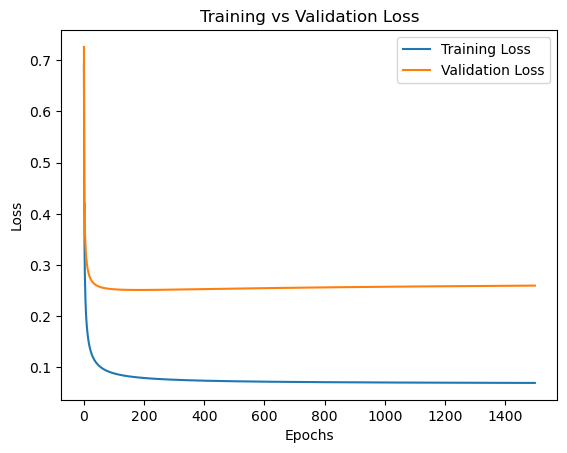

In [97]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [98]:
h_test = hyp(x_test_tensor_new,theta)
y_hat = torch.clone(y_test_tensor).reshape(-1, 1)
y_hat[h_test<0.5] = 0
y_hat[h_test>=0.5] = 1
accuray = (y_hat == y_test_tensor).sum().item() / y_test_tensor.size(0)
print(f'accuracy: {accuray*100:.2f}%')

accuracy: 89.74%


In [99]:
class_report = classification_report(y_test, y_hat)
print(class_report)

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93      6766
         1.0       0.64      0.98      0.77      1452

    accuracy                           0.90      8218
   macro avg       0.82      0.93      0.85      8218
weighted avg       0.93      0.90      0.91      8218



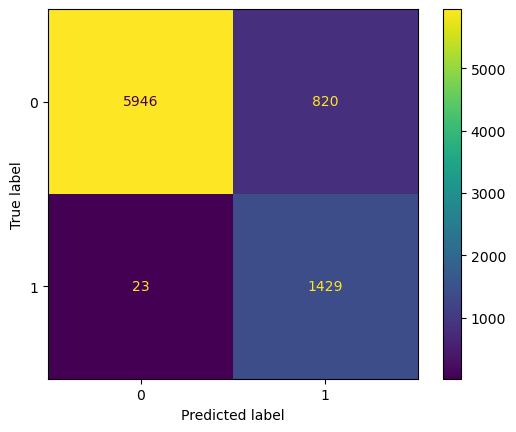

In [100]:
# Ensure confusion_matrix is correctly imported and used
confusion_matrix = metrics.confusion_matrix(y_test, y_hat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

## Neural Network (Agent Loid Panha)

In [101]:

def my_model1(X, w1, b1, w2, b2, w3, b3, w4, b4, w5, b5):
    # Layer 1
    z1 = torch.matmul(X, w1) + b1
    a1 = torch.sigmoid(z1)  # Use ReLU instead of Sigmoid

    # Layer 2
    z2 = torch.matmul(a1, w2) + b2
    a2 = torch.sigmoid(z2)

    # Layer 3
    z3 = torch.matmul(a2, w3) + b3
    a3 = torch.sigmoid(z3)

    # Layer 4
    z4 = torch.matmul(a3, w4) + b4
    a4 = F.relu(z4)

    # Output layer (use Sigmoid for binary classification)
    z5 = torch.matmul(a4, w5) + b5
    output = torch.sigmoid(z5)  

    return output

In [102]:
# Initialize parameters
w1 = torch.randn((5, 64), requires_grad=True , )
b1 = torch.randn((1, 64), requires_grad=True)
w2 = torch.randn((64, 32), requires_grad=True)
b2 = torch.randn((1, 32), requires_grad=True)
w3 = torch.randn((32, 16), requires_grad=True)
b3 = torch.randn((1, 16), requires_grad=True)
w4 = torch.randn((16, 8), requires_grad=True)
b4 = torch.randn((1, 8), requires_grad=True)
w5 = torch.randn((8, 1), requires_grad=True)
b5 = torch.randn((1, 1), requires_grad=True)

# Loss function and optimizer
cost_function = nn.BCELoss()
optimizer = op.SGD([w1, b1, w2, b2, w3, b3,w4,b4,w5,b5], lr=1)

# Hyperparameters
epochs = 200

# Lists to track losses
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Forward pass for training data
    output = my_model1(x_train_tensor, w1, b1, w2, b2, w3, b3,w4,b4,w5,b5)
    train_cost = cost_function(output, y_train_tensor.reshape(-1, 1))

    # Backpropagation
    optimizer.zero_grad()  # Reset gradients
    train_cost.backward()
    optimizer.step()  # Update parameters

    # Compute validation loss (no gradients required)
    with torch.no_grad():
        val_output = my_model1(x_validate_tensor, w1, b1, w2, b2, w3, b3,w4,b4,w5,b5)
        val_cost = cost_function(val_output, y_validate_tensor.reshape(-1, 1))

    # Store losses for tracking
    train_losses.append(train_cost.item())
    val_losses.append(val_cost.item())

    # Print training and validation loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1:03d}: train_loss = {train_cost.item():.4f}, val_loss = {val_cost.item():.4f}')

Epoch 100: train_loss = 0.0806, val_loss = 0.3018
Epoch 200: train_loss = 0.0710, val_loss = 0.3155


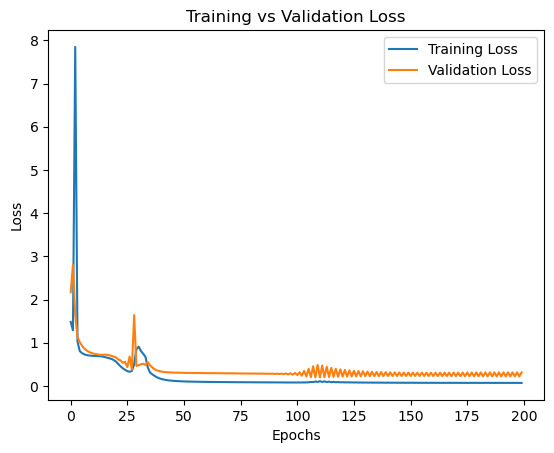

In [103]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [104]:
# evaluate the model
output = my_model1(x_test_tensor, w1, b1, w2, b2,w3, b3,w4,b4,w5,b5)
y_hat = torch.clone(y_test_tensor).reshape(-1, 1)
y_hat[output<0.5] = 0
y_hat[output>=0.5] = 1
accuray = (y_hat.reshape(-1,1) == y_test_tensor.reshape(-1,1)).sum().item() / y_test_tensor.size(0)
print(f'accuracy: {accuray*100:.2f}%')

accuracy: 89.05%


In [105]:
class_report = classification_report(y_test, y_hat)
print(class_report)

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93      6766
         1.0       0.62      0.99      0.76      1452

    accuracy                           0.89      8218
   macro avg       0.81      0.93      0.84      8218
weighted avg       0.93      0.89      0.90      8218



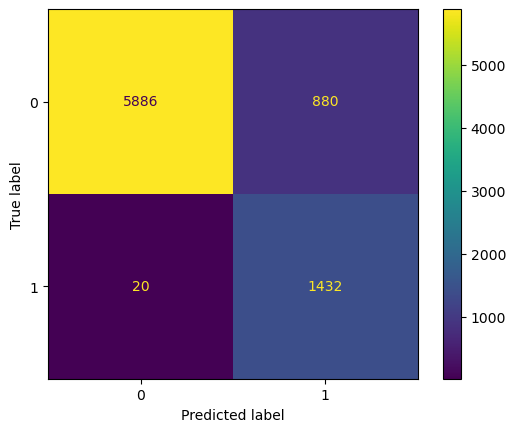

In [106]:
# Ensure confusion_matrix is correctly imported and used
confusion_matrix = metrics.confusion_matrix(y_test, y_hat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

## Architeture 2

In [107]:
import torch.nn.functional as F

def my_model2(X, w1, b1, w2, b2, w3, b3, dropout_rate=0.3):
    z1 = torch.matmul(X, w1) + b1
    a1 = torch.sigmoid(z1)

    z2 = torch.matmul(a1, w2) + b2
    a2 = torch.sigmoid(z2)

    z3 = torch.matmul(a2, w3) + b3
    output = torch.sigmoid(z3)

    return output


In [108]:
# Initialize parameters
w1 = torch.randn((5, 16), requires_grad=True)
b1 = torch.randn((1, 16), requires_grad=True)
w2 = torch.randn((16, 8), requires_grad=True)
b2 = torch.randn((1, 8), requires_grad=True)
w3 = torch.randn((8, 1), requires_grad=True)
b3 = torch.randn((1, 1), requires_grad=True)

# Loss function and optimizer
cost_function = nn.BCELoss()
optimizer = op.SGD([w1, b1, w2, b2, w3, b3], lr=1)

# Hyperparameters
epochs = 3000

# Lists to track losses
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Forward pass for training data
    output = my_model2(x_train_tensor, w1, b1, w2, b2, w3, b3)
    train_cost = cost_function(output, y_train_tensor.reshape(-1, 1))

    # Backpropagation
    optimizer.zero_grad()  # Reset gradients
    train_cost.backward()
    optimizer.step()  # Update parameters

    # Compute validation loss (no gradients required)
    with torch.no_grad():
        val_output = my_model2(x_validate_tensor, w1, b1, w2, b2, w3, b3)
        val_cost = cost_function(val_output, y_validate_tensor.reshape(-1, 1))

    # Store losses for tracking
    train_losses.append(train_cost.item())
    val_losses.append(val_cost.item())

    # Print training and validation loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1:03d}: train_loss = {train_cost.item():.4f}, val_loss = {val_cost.item():.4f}')

Epoch 100: train_loss = 0.1065, val_loss = 0.2715
Epoch 200: train_loss = 0.0883, val_loss = 0.2778
Epoch 300: train_loss = 0.0832, val_loss = 0.2784
Epoch 400: train_loss = 0.0796, val_loss = 0.2745
Epoch 500: train_loss = 0.0764, val_loss = 0.2686
Epoch 600: train_loss = 0.0735, val_loss = 0.2625
Epoch 700: train_loss = 0.0711, val_loss = 0.2578
Epoch 800: train_loss = 0.0692, val_loss = 0.2547
Epoch 900: train_loss = 0.0678, val_loss = 0.2528
Epoch 1000: train_loss = 0.0667, val_loss = 0.2516
Epoch 1100: train_loss = 0.0658, val_loss = 0.2508
Epoch 1200: train_loss = 0.0651, val_loss = 0.2504
Epoch 1300: train_loss = 0.0646, val_loss = 0.2501
Epoch 1400: train_loss = 0.0641, val_loss = 0.2500
Epoch 1500: train_loss = 0.0638, val_loss = 0.2499
Epoch 1600: train_loss = 0.0634, val_loss = 0.2500
Epoch 1700: train_loss = 0.0632, val_loss = 0.2500
Epoch 1800: train_loss = 0.0629, val_loss = 0.2501
Epoch 1900: train_loss = 0.0627, val_loss = 0.2503
Epoch 2000: train_loss = 0.0625, val_los

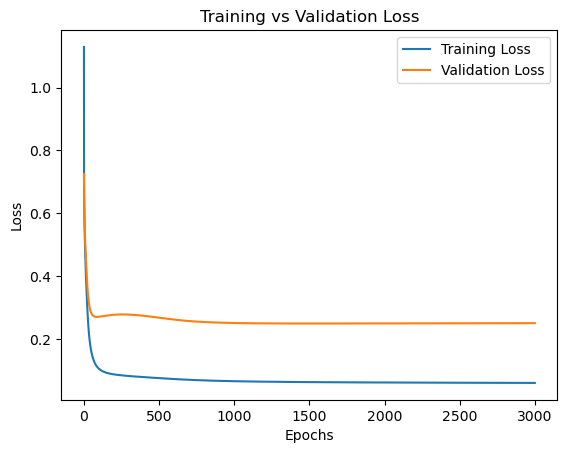

In [109]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [110]:
# evaluate the model
output = my_model2(x_test_tensor, w1, b1, w2, b2,w3, b3)
y_hat = torch.clone(y_test_tensor).reshape(-1, 1)
y_hat[output<0.5] = 0
y_hat[output>=0.5] = 1
accuray = (y_hat.reshape(-1,1) == y_test_tensor.reshape(-1,1)).sum().item() / y_test_tensor.size(0)
print(f'accuracy: {accuray*100:.2f}%')

accuracy: 90.30%


In [111]:
class_report = classification_report(y_test, y_hat)
print(class_report)

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      6766
         1.0       0.65      0.98      0.78      1452

    accuracy                           0.90      8218
   macro avg       0.82      0.93      0.86      8218
weighted avg       0.93      0.90      0.91      8218



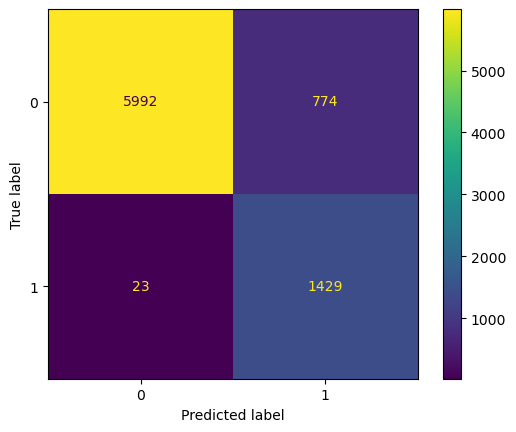

In [112]:
# Ensure confusion_matrix is correctly imported and used
confusion_matrix = metrics.confusion_matrix(y_test, y_hat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()